# Tema 2: Procesamiento de imágenes digitales. Transformaciones Geométricas


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Transformaciones geométricas sobre el dominio de la imagen

En este apartado aprenderemos a realizar tranformaciones afines básicas, transformaciones afines generales y homografías con OpenCV.

512
512
3


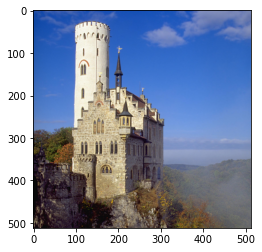

In [2]:
image = cv2.imread("Lichtenstein_img_processing_test.png")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
rows, cols, depth = image.shape
print(rows)
print(cols)
print(depth)

## Redimensionar (escalar) una imagen


A continuación vamos a submuestrear una imagen con y sin suavizado previo

Dimensiones originales :  (512, 512, 3)


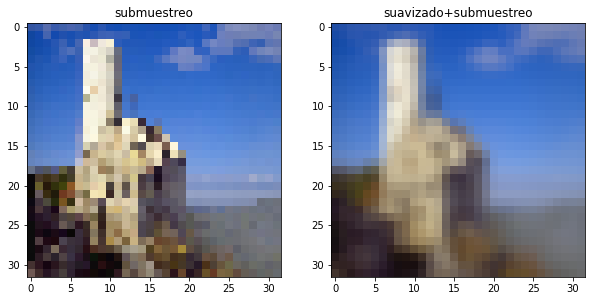

In [3]:
# A continuación se muestra como visualizar la imagen completa ampliada al doble de resolución en cada dimensión
SUBMUESTREO=16
SIGMA=10 # Filtrado previo

print('Dimensiones originales : ',image.shape)
escala = 2.0 # doble tamaño original en cada dimensión
ancho = int(image.shape[1] * escala)
alto = int(image.shape[0] * escala)
dims = (ancho, alto)

# Submuestreo de SUBMUESTREO en SUBMUESTREO filas o columnas
reducida = image[0:-1:SUBMUESTREO, 0:-1:SUBMUESTREO, :].copy()

plt.figure(figsize=[10, 10])
plt.subplot(1,2,1)
plt.title('submuestreo')
plt.imshow(cv2.cvtColor(reducida, cv2.COLOR_BGR2RGB))

# Vamos a suavizar antes de submuestrear
ksize = 1 + 2 * 3 * SIGMA
image_gaussblur = cv2.GaussianBlur(image, (ksize, ksize), SIGMA)
# Submuestreo de 16 en 16 filas o columnas
reducida = image_gaussblur[0:-1:SUBMUESTREO, 0:-1:SUBMUESTREO, :].copy()

plt.subplot(1,2,2)
plt.title('suavizado+submuestreo')
plt.imshow(cv2.cvtColor(reducida, cv2.COLOR_BGR2RGB))
plt.show()

Nuevas dimensiones :  (512, 512, 3)


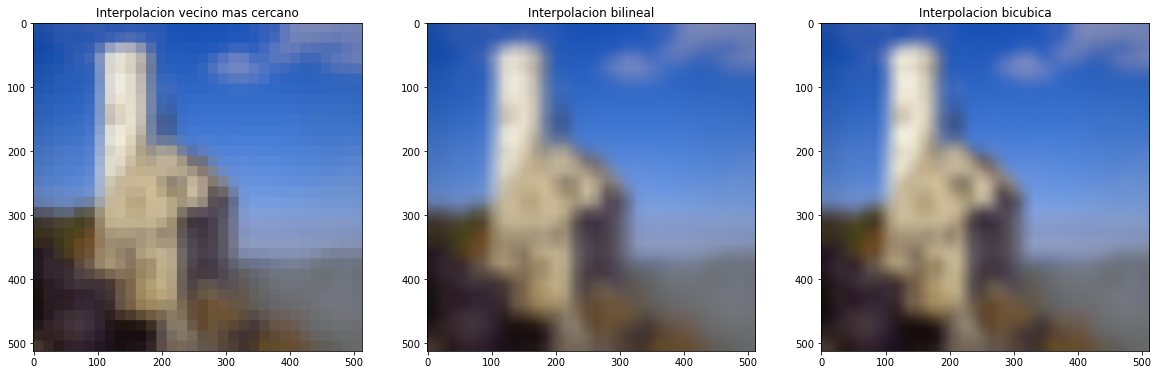

In [4]:
# A continuación se muestra como aumentar el tamaño de la imagen que hemos reducido previamente

# reescalado interpolando al vecino más cercano
dimsOrig=(image.shape[1], image.shape[0])
resEsc2 = cv2.resize(reducida, dimsOrig, interpolation = cv2.INTER_NEAREST)
print('Nuevas dimensiones : ',resEsc2.shape)
plt.figure(figsize=[20, 20])
plt.subplot(1,3,1)
plt.title('Interpolacion vecino mas cercano')
plt.imshow(cv2.cvtColor(resEsc2, cv2.COLOR_BGR2RGB))

# reescalado realizando interpolación bilineal
resEsc3 = cv2.resize(reducida, dimsOrig, interpolation = cv2.INTER_LINEAR)
plt.subplot(1,3,2)
plt.title('Interpolacion bilineal')
plt.imshow(cv2.cvtColor(resEsc3, cv2.COLOR_BGR2RGB))

# reescalado realizando interpolación bicubica
resEsc4 = cv2.resize(reducida, dimsOrig, interpolation = cv2.INTER_CUBIC)
plt.subplot(1,3,3)
plt.title('Interpolacion bicubica')
plt.imshow(cv2.cvtColor(resEsc4, cv2.COLOR_BGR2RGB))
plt.show()

## Traslaciones, rotaciones y escalados


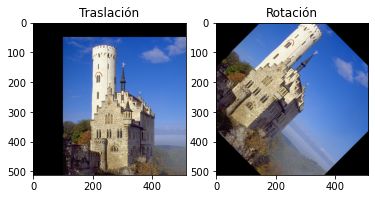

In [5]:
# A continuación se muestra el resultado de transladar y rotar la imagen original
# Estas operaciones son las transformaciones afines más comunes.

M = np.float32([[1,0,100],[0,1,50]]) # Matriz de traslación
resTras = cv2.warpAffine(image,M,(cols,rows))
plt.subplot(1,2,1)
plt.title('Traslación')
plt.imshow(cv2.cvtColor(resTras, cv2.COLOR_BGR2RGB))

M = np.float32(cv2.getRotationMatrix2D((cols/2,rows/2),-45,1)) # Matriz de rotación
resRot = cv2.warpAffine(image,M,(cols,rows))
plt.subplot(1,2,2)
plt.title('Rotación')
plt.imshow(cv2.cvtColor(resRot, cv2.COLOR_BGR2RGB))

plt.show()

*Ejercicio:* Definir dos respectivas transformaciones de escalado para ampliar y reducir una imagen dada.

In [ ]:
# Escalados de reducción y ampliación de la imagen

M = # __POR_HACER__ # Matriz de escalado para reducir el tamaño
resEsc1 = cv2.warpAffine(image,M,(cols,rows))
plt.subplot(1,2,1)
plt.title('Reducción')
plt.imshow(cv2.cvtColor(resEsc1, cv2.COLOR_BGR2RGB))

M = # __POR_HACER__ # Matriz de escalado para aumentar el tamaño
resEsc2 = cv2.warpAffine(image,M,(cols,rows))
plt.subplot(1,2,2)
plt.title('Ampliación')
plt.imshow(cv2.cvtColor(resEsc2, cv2.COLOR_BGR2RGB))

plt.show()

*Ejercicio:* ¿Cómo conseguir visualizar la imagen completa después de una transformación? En general basta con transformar las 4 esquinas de la imagen, calcular el nuevo tamaño y trasladar las coordenadas para que quepa.

In [ ]:
M = np.float32(cv2.getRotationMatrix2D((cols/2,rows/2),-45,1)) # Matriz de rotación
resRot = cv2.warpAffine(image,M,(cols,rows))
plt.title('Rotación')
plt.imshow(cv2.cvtColor(resRot, cv2.COLOR_BGR2RGB))

rows, cols, depth = image.shape
# Se necesitan coordenadas columna, fila
coords = np.array([[0, 0, 1],
                   [cols-1, 0, 1], 
                   [cols-1, rows-1, 1], 
                   [0, rows-1, 1]])
# Transformamos las esquinas
coords_trans = M @ coords.T
xs = coords_trans[0, :]
ys = coords_trans[1, :]

# Obtenemos las coordenadas del rectángulo que inscribe a la imagen 
# transformada.
top = int(ys.min())
bottom = int(ys.max())
left = int(xs.min())
right = int(xs.max())

# Calculamos una traslación que haga que la imagen quepa entera
M2 = # POR HACER: Definir la matriz de la transformación
nuevo_ancho = # POR HACER
nuevo_alto = # POR HACER
resRot = cv2.warpAffine(image,M2,(nuevo_ancho, nuevo_alto))
plt.figure()
plt.title('Rotación + traslación + cambio tamaño imagen')
plt.imshow(cv2.cvtColor(resRot, cv2.COLOR_BGR2RGB))

### Transformaciones afines generales


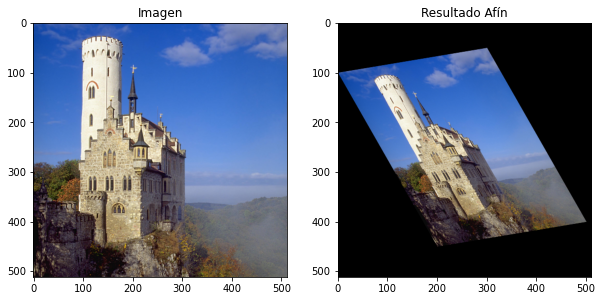

In [34]:
# También es posible definir una transformación afin general (matriz de 2x3) a partir de
# las coordenadas de tres puntos y sus transformados.
# A continuación se define la transformación afín general y se visualiza el resultado.

pts1 = np.float32([[0,0],[cols-1,0],[cols-1, rows-1]])     # Se seleccionan 3 puntos en la imagen original
pts2 = np.float32([[0,100],[300,50],[500,400]])   # Se seleccionan 3 en la imagen resultado

M = cv2.getAffineTransform(pts1,pts2)         # Define M la matriz 2x3 de transformación afin
result = cv2.warpAffine(image,M,(cols,rows))  # Aplica M a la imagen

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Imagen')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('Resultado Afín')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

## Homografías


(512, 512, 3)
(512, 512, 3)


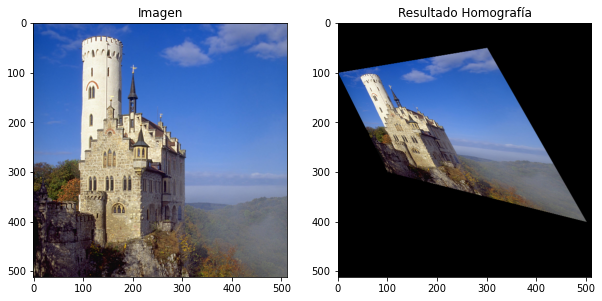

In [35]:
# Se analiza ahora el efecto de una homografía general (matriz de 3x3) aplicada a una imagen de entrada.
# A partir de las coordenadas de cuatro puntos y sus transformados podemos definir la transformación.

pts1 = np.float32([[0,0],[cols-1,0],[cols-1,rows-1],[0,rows-1]]) # Se seleccionan 4 puntos en la imagen original
pts2 = np.float32([[0,100],[300,50],[500,400], [100, 300]]) # Se seleccionan 4 punros el espacio del resultado

M , status = cv2.findHomography(pts1,pts2)           # Se definela matriz M 3x3 correspondiente a la homografía
result = cv2.warpPerspective(image,M,(cols, rows))  # Se aplica M a la imagen
print(resEsc2.shape)
print(result.shape)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Imagen')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('Resultado Homografía')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

*Ejercicio:* Conseguir 2 imágenes, una con una región plana rectangular que vamos a substituir con la imagen de un objeto plano de nuestra elección (ver transparencias de clase)